# Superposition in space, land strip sudden change same at both ends

IHE, transient groundwater

Olsthoorn, 2019-01-02

The 1D aquifer has a limited width equal to $L$. The head at $x=0$ changes suddenly at $t=0$ by the value $a$, while the head at $x=L$ remains fixed.

The solution for an infinite aquifer with sudden head change at $x=0$ reads

$$ s(x, t) = s(x, 0) \, \mathtt{erfc} \left(\sqrt{\frac {x^2 S} {4 kD t}} \right) $$

In this case the head change at $t=0$ is at both ends of the strip and equal to $a$.

For convenience and symmetry we choose $x=0$ in the center of the strip. So the left is $x=-L/2$ and the right it is $x=+L/2$.

Compensating sudden head change at the left side requires mirror changes equal to $-a$ at $x = \pm (2 i - \frac 1 2) L$ atarting at $i=0$ and mirror changes equal to $-a$ at $x = \pm (2 i - \frac 1 2) L $ starting at $i=1$.

This superposition can, therefore, be written as

$$ s(x, t) = a \left[ \sum _0 ^\infty \left\{
 \mathtt{erfc} \left(((2 i + \frac 1 2) L + x) \sqrt{ \frac S {4 kD t} } \right)
+
\mathtt{erfc} \left(((2 i + \frac 1 2) L - x) \sqrt{\frac S {4 kD t}} \right) 
\right\}
-
 \sum_1 ^\infty \left\{
\mathtt{erfc} \left(((2 i - \frac 1 2) L - x) \sqrt{\frac S {4 kD t}} \right)
+
\mathtt{erfc} \left(((2 i - \frac 1 2) L + x) \sqrt{\frac S {4 kD t}} \right)
\right\} \right] $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

## Strip with $x=0$ at left, $-L/2 < x < L/2$

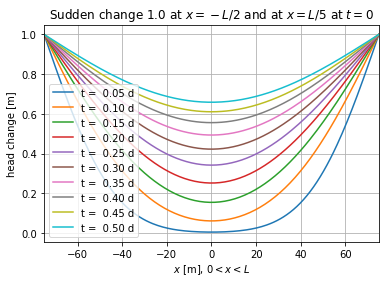

In [4]:
L = 150 # m (strip wirdth)
x = np.linspace(-L/2, L/2, 201) # points, taking left at zero.
kD = 600 # m2/d
S = 0.1 # [-]
a = 1.0 # m, sudden head change at x = -L/2
times = np.linspace(0, 0.5, 11)[1:] # d

plt.title('Sudden change {:.1f} at $x = -L/2$ and at $x = L/5$ at $t=0$'.format(a))
plt.xlabel('$x$ [m], $ 0 < x < L $')
plt.ylabel('head change [m]')
plt.xlim((-L/2, L/2))
plt.grid()
for t in times:
    rt = np.sqrt(S / (4 * kD * t))
    s = np.zeros_like(x)
    for i in range(20):
        s += a * erfc(((2 * i + 0.5) * L + x) * rt)
        s += a * erfc(((2 * i + 0.5) * L - x) * rt)
        if i > 0:
            s -= a * erfc(((2 * i - 0.5) * L - x) * rt)
            s -= a * erfc(((2 * i - 0.5) * L + x) * rt)
    plt.plot(x, s, label='t = {:5.2f} d'.format(t))
plt.legend()
plt.show()
        
